Get the data<br>
Temperature

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import layers
plt.style.use('seaborn-poster')

from scipy import stats
import statsmodels.api as sm

from itertools import product
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('testset.csv')

Let's understand the data

In [6]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [7]:
df.shape

(100990, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

As we observe that <br>
total rows : 100990 <br> total columns : 20 <br>
and many columns have null values

In [9]:
missing_val = pd.DataFrame({'Missing_values':df.isna().sum(),"missing_val_percentage": (df.isna().sum()/df.shape[0])*100})
missing_val

,Missing_values,missing_val_percentage
datetime_utc,0,0.000000
_conds,72,0.071294
_dewptm,621,0.614912
_fog,0,0.000000
_hail,0,0.000000
_heatindexm,71835,71.130805
_hum,757,0.749579
_precipm,100990,100.000000
_pressurem,232,0.229726
_rain,0,0.000000


Okay let's drop the columns which have missing values more than 70% 

In [10]:
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [11]:
df.drop(columns=[' _precipm',' _heatindexm',' _wgustm',' _windchillm'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _hum         100233 non-null  float64
 6    _pressurem   100758 non-null  float64
 7    _rain        100990 non-null  int64  
 8    _snow        100990 non-null  int64  
 9    _tempm       100317 non-null  float64
 10   _thunder     100990 non-null  int64  
 11   _tornado     100990 non-null  int64  
 12   _vism        96562 non-null   float64
 13   _wdird       86235 non-null   float64
 14   _wdire       86235 non-null   object 
 15   _wspdm       98632 non-null   float64
dtypes: float64(7), int64(6), object(3)
memory usage: 12.3+ MB


In [13]:
df.describe()

,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm
count,100369.000000,100990.000000,100990.000000,100233.000000,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,98632.000000
mean,15.741205,0.069690,0.000129,57.909481,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,7.678463
std,7.058587,0.254625,0.011345,23.807771,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,11.932157
min,-24.000000,0.000000,0.000000,4.000000,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,39.000000,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,0.000000
50%,15.000000,0.000000,0.000000,59.000000,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,7.400000
75%,22.000000,0.000000,0.000000,78.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,11.100000
max,75.000000,1.000000,1.000000,243.000000,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,1514.900000


## Let's perform Exploratory Data Analysis 

1. Conditions 

In [14]:
df[' _conds'].value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

[]

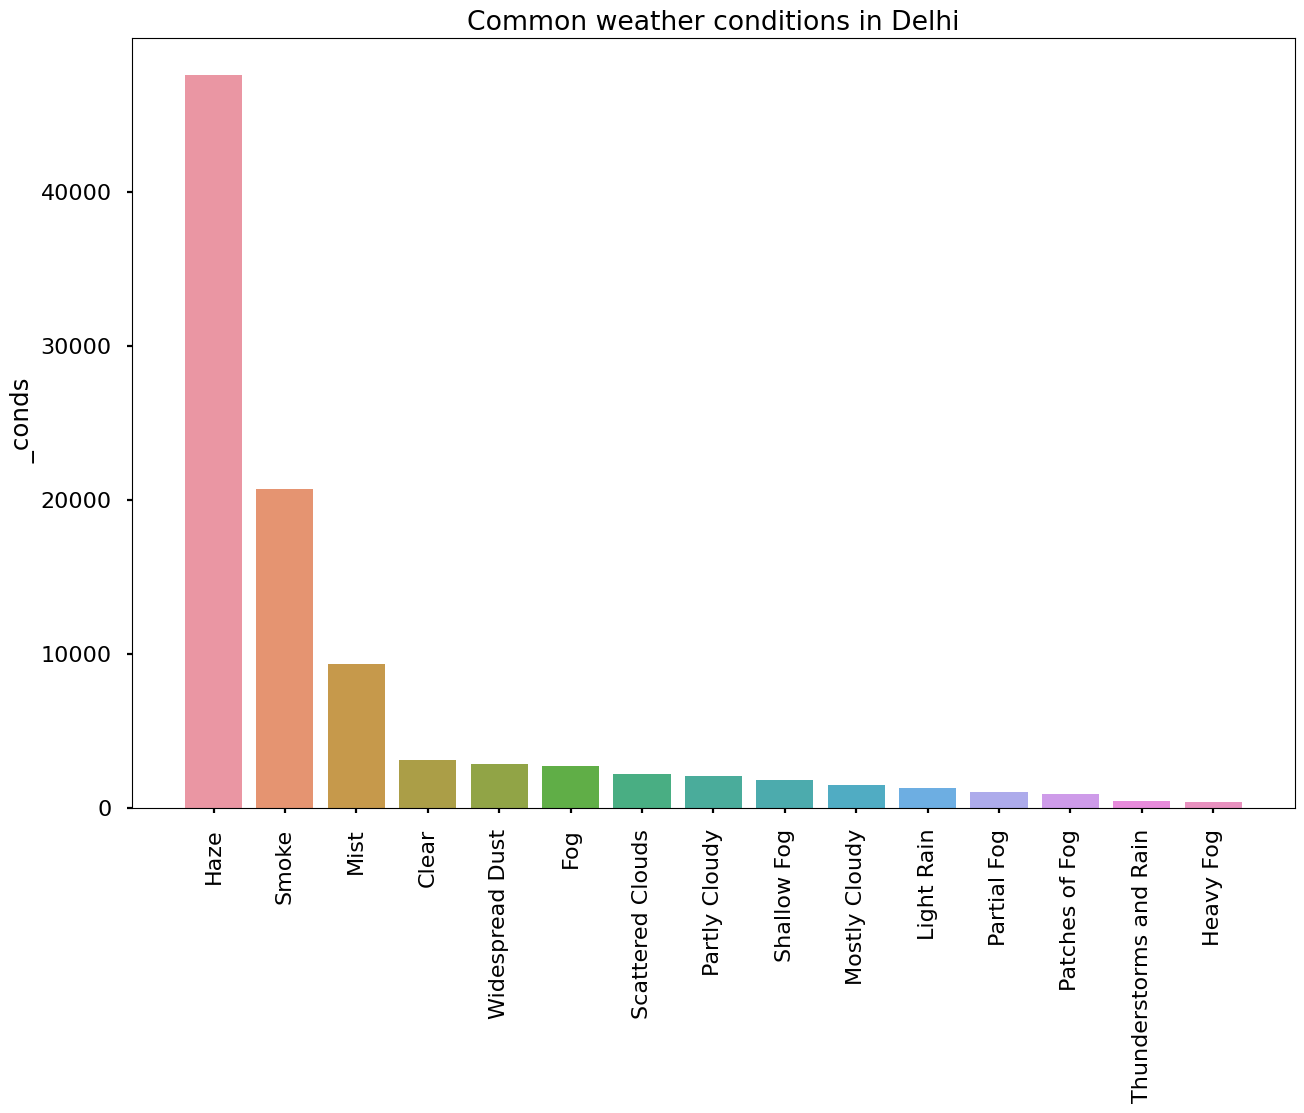

In [15]:
plt.figure(figsize=(15,10))
plt.title('Common weather conditions in Delhi')
sns.barplot(data=df,y=df[' _conds'].value_counts()[:15],x=df[' _conds'].value_counts().keys()[:15])
plt.xticks(rotation=90)
plt.plot()

`Haze` and `Smoke` are the most common weather conditions in Delhi

2. Wind Direction

In [13]:
df[' _wdire'].value_counts()

North       19034
West        11888
WNW          7464
East         7233
NW           7117
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name:  _wdire, dtype: int64

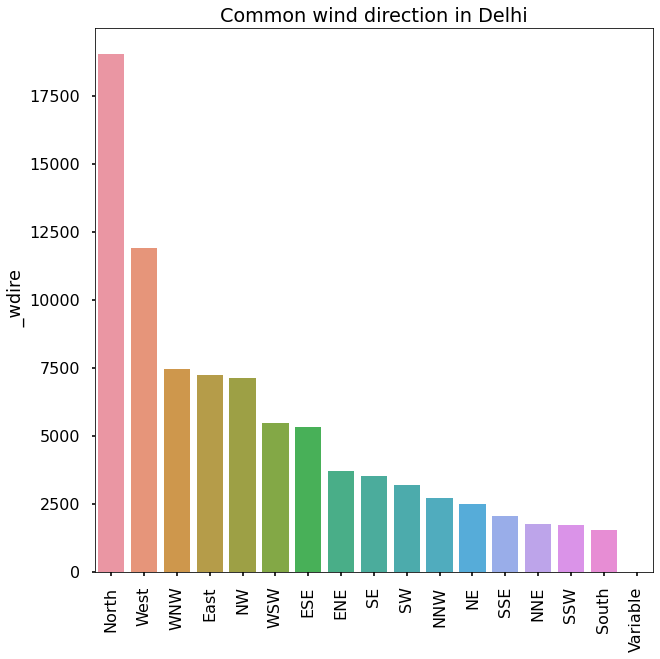

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x=df[' _wdire'].value_counts().keys(),y=df[' _wdire'].value_counts())
plt.title('Common wind direction in Delhi')
plt.xticks(rotation=90)
plt.show()

`North` and `West` are the most common wind direction in Delhi

3. Temperature

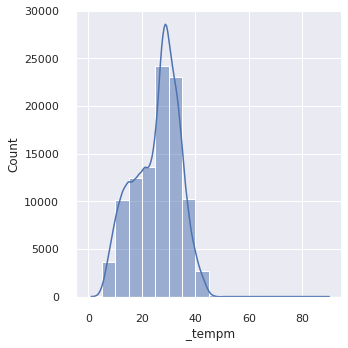

In [15]:
sns.set_theme(style='darkgrid')
sns.displot(df[' _tempm'],bins = [i for i in range(0,61,5)],kde=True)

As we can observe that the temperature of Delhi is in range of 25 to 35<br><br>
For further analysis let's convert dates in datetime

In [16]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

Lets extract month and year from date

In [17]:
df['Month_name'] = df['datetime_utc'].dt.month_name()
df['Month'] = df['datetime_utc'].dt.month
df['Year'] = df['datetime_utc'].dt.year

In [18]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,Month_name,Month,Year
0,1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,November,11,1996
1,1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,November,11,1996
2,1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,November,11,1996
3,1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,November,11,1996
4,1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,November,11,1996


In `_tempm`, we have observed that some missing values are present. Lets fill them

In [19]:
df[' _tempm'].fillna(df[' _tempm'].mean(),inplace=True)
df[' _tempm'].isna().sum()

0

Its time to visualize temperature as per year and month

In [20]:
temp_yr_mon = pd.crosstab(df['Year'],df['Month'],values=df[' _tempm'],aggfunc='mean')

In [21]:
temp_yr_mon

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.488145,14.026110
1997,13.063475,15.830687,21.184446,26.304116,29.909869,31.745214,31.087132,29.467082,29.710198,24.143141,19.982586,13.737461
1998,13.155684,16.522225,19.893251,28.698630,33.994089,32.450593,29.930593,29.189565,29.122685,25.284581,20.312433,14.697139
1999,12.542130,16.717543,22.452373,31.398329,34.263086,34.273255,31.992749,32.892425,30.710109,27.691203,22.657713,15.260374
2000,13.815132,15.125176,NaN,35.000000,26.000000,32.449895,30.249515,31.887647,30.132663,28.199244,22.119181,16.165175
2001,12.657776,18.286759,23.560144,29.663181,32.987991,30.980764,30.911467,31.112365,31.173711,27.830927,21.616841,15.958141
2002,14.260843,17.462396,24.526204,32.056928,35.370900,34.215493,35.349460,30.679024,28.412801,27.146409,21.366164,16.896483
2003,11.925121,17.956166,23.532102,31.715728,34.945450,35.449781,30.287187,29.962944,28.945838,26.448644,20.367266,15.206563
2004,13.226186,18.730414,26.631785,31.856787,34.312103,33.068457,32.652663,29.600181,29.948052,24.257797,19.474359,15.530214


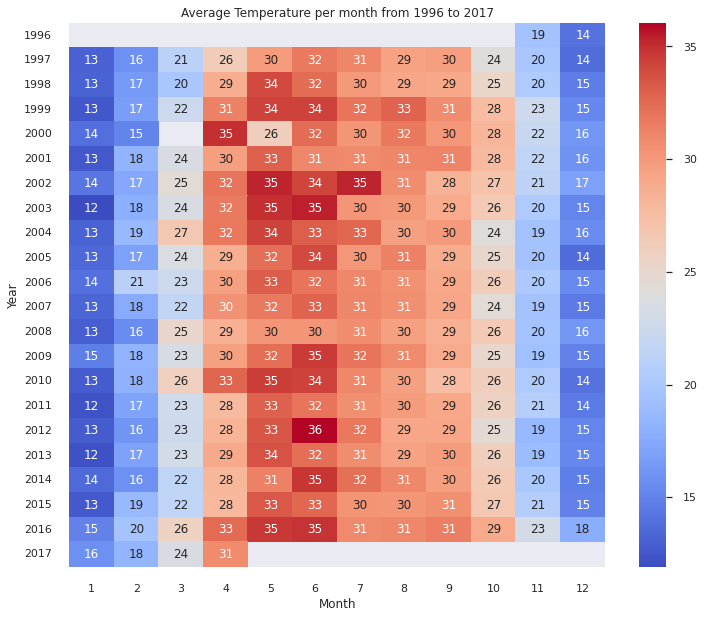

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(temp_yr_mon,cmap='coolwarm',annot=True)
plt.title("Average Temperature per month from 1996 to 2017")
plt.show()

Lets understand Humidity

In [23]:
print("Missing values in Himudity : ",df[' _hum'].isna().sum())
print("Filling them with mean")
df[' _hum'].fillna(df[' _hum'].mean(),inplace=True)
print('Missing values recheck : ',df[' _hum'].isna().sum())

Missing values in Himudity :  757
Filling them with mean
Missing values recheck :  0


In [24]:
humidity = pd.crosstab(df['Year'],df['Month'],values=df[' _hum'],aggfunc='mean')

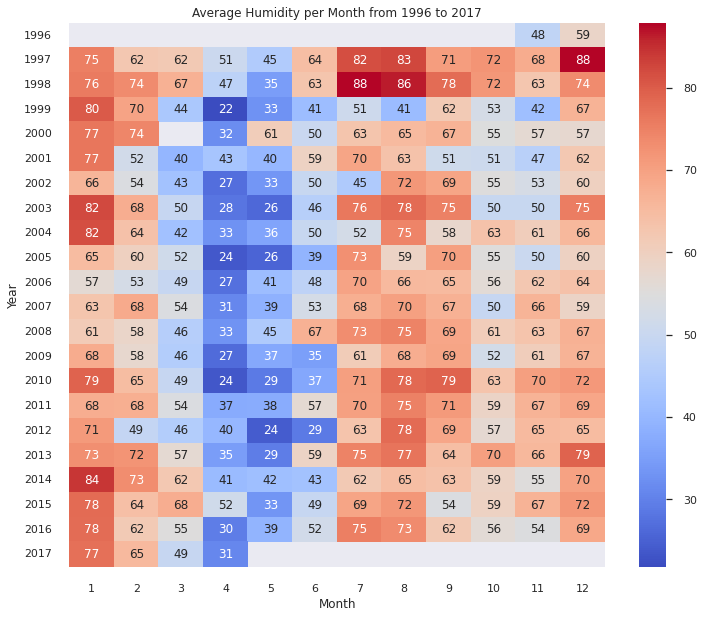

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(humidity,cmap='coolwarm',annot=True)
plt.title('Average Humidity per Month from 1996 to 2017')
plt.show()

Lets see if we can find any correlation pattern between columns

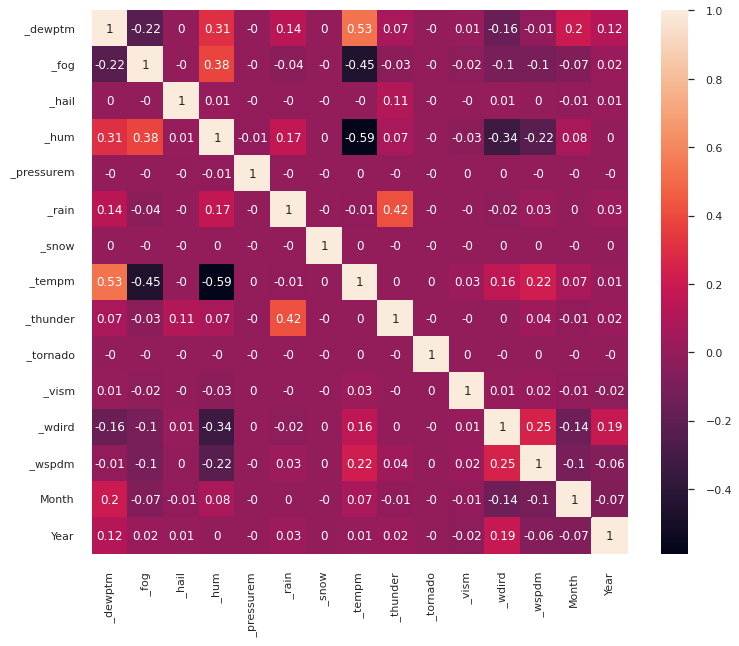

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr().round(2),annot=True)
plt.show()

Here, we can clearly observe that `temperature i.e _tempm` is negatively orrelated with humidity and Fog<br> and positively correlated with `_dewptm`<br>
`_wdird` and `_wspdm` also play small role in increasing temperature

# Time Series Forecasting

We will analyze two columns `datetime` and `Temperature`

In [27]:
df['datetime_utc']

0        1996-11-01 11:00:00
1        1996-11-01 12:00:00
2        1996-11-01 13:00:00
3        1996-11-01 14:00:00
4        1996-11-01 16:00:00
                 ...        
100985   2017-04-24 06:00:00
100986   2017-04-24 09:00:00
100987   2017-04-24 12:00:00
100988   2017-04-24 15:00:00
100989   2017-04-24 18:00:00
Name: datetime_utc, Length: 100990, dtype: datetime64[ns]

We have data collected per Hour. For our forecasting we want data per day. Hence we'll use resampling to achieve our goal 

In [28]:
data = pd.DataFrame(list(df[' _tempm']),index=df['datetime_utc'],columns=['temp'])

In [29]:
data.head()

,temp
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


In [30]:
data_day = data.resample('D').mean()
data_month = data.resample('M').mean()
data_year = data.resample('A-DEC').mean()


In [31]:
data_day.isna().sum(),data_month.isna().sum(),data_year.isna().sum()

(temp    141
 dtype: int64, temp    1
 dtype: int64, temp    0
 dtype: int64)

It seems after resampling we have some missing values. We'll use forward fill for those values

In [32]:
data_day.fillna(method='ffill',inplace=True)
data_month.fillna(method='ffill',inplace=True)
data_day.isna().sum(),data_month.isna().sum()

(temp    0
 dtype: int64, temp    0
 dtype: int64)

##  Time to visualize

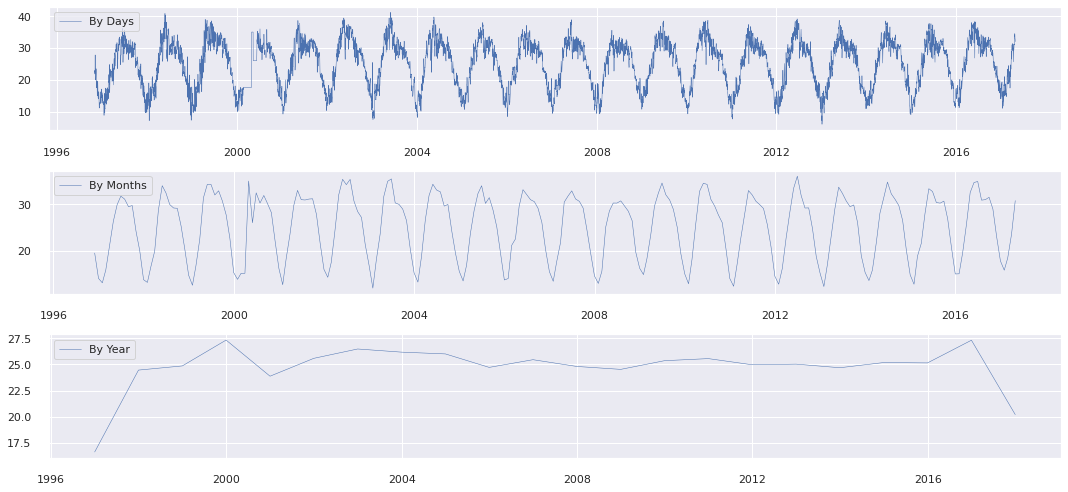

In [33]:
fig = plt.figure(figsize=(15,7))

plt.subplot(311)
plt.plot(data_day, linewidth=0.5,label='By Days')
plt.legend()

plt.subplot(312)
plt.plot(data_month, linewidth=0.5,label='By Months')
plt.legend()

plt.subplot(313)
plt.plot(data_year, linewidth=0.5,label='By Year')
plt.legend()

plt.tight_layout()
plt.show()

Good! We hve seasonality in our time series

In [34]:
rolmean = data_day.rolling(window=7).mean()
rolstd = data_day.rolling(window=7).std()

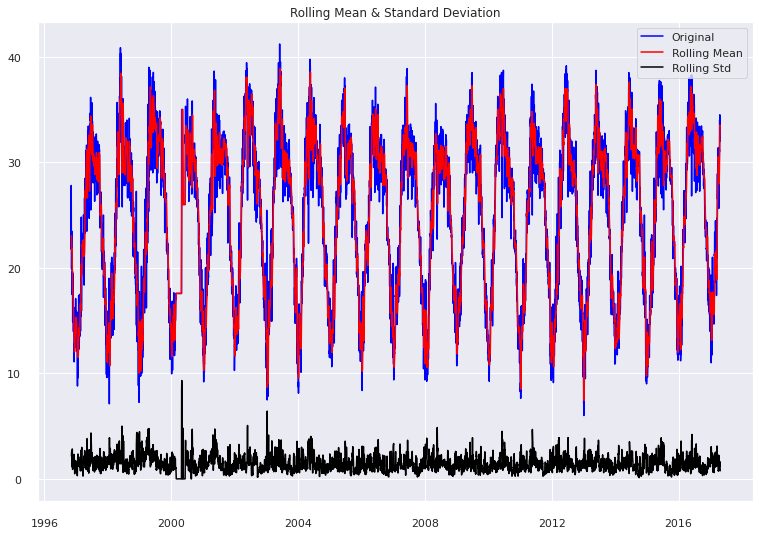

In [35]:
orig = plt.plot(data_day, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [36]:
print('Results of Dickey Fuller Test:')
dftest = sm.tsa.stattools.adfuller(data_day['temp'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -7.165748e+00
p-value                        2.889533e-10
#Lags Used                     3.600000e+01
Number of Observations Used    7.443000e+03
Critical Value (1%)           -3.431229e+00
Critical Value (5%)           -2.861928e+00
Critical Value (10%)          -2.566977e+00
dtype: float64


Here We should observe two points<br>
1. p-value should be as small as possible. In out case, it is 2.8895e-10<br>
2. Test Statistics value should be very much closer to Critical values . In our case, we can observe that. <br><br>
We observe that the Time Series is stationary

In [37]:
decomposition = sm.tsa.seasonal_decompose(data_day)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

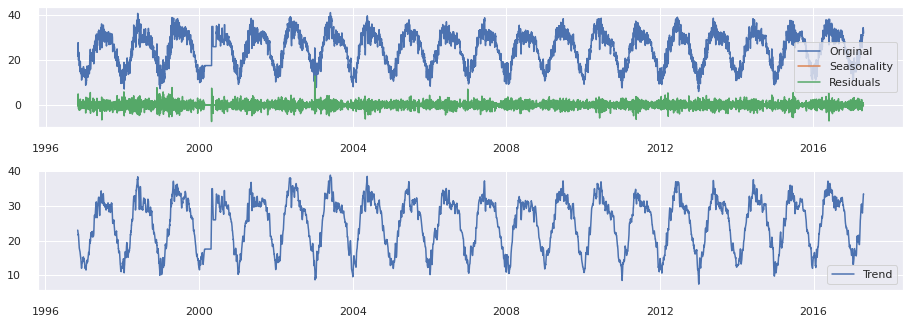

In [38]:
plt.subplot(411)
plt.plot(data_day, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()


In [39]:
data_day_shifted = data_day - data_day.shift(7)
data_day_shifted.dropna(inplace=True)

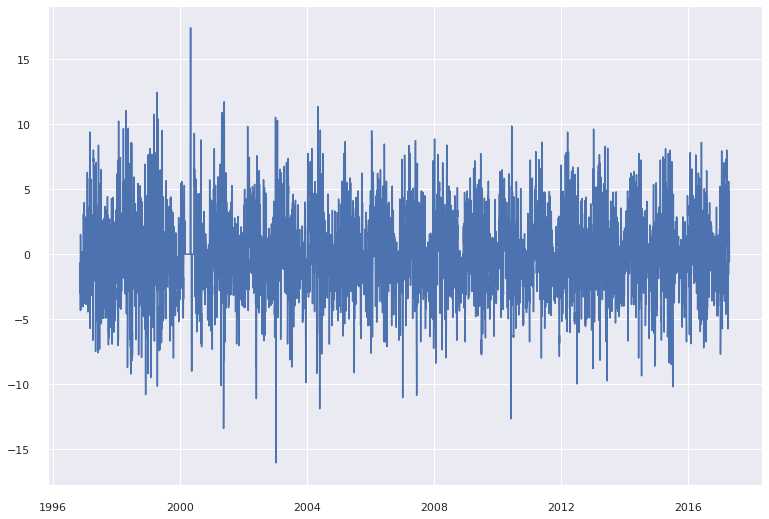

In [40]:
plt.plot(data_day_shifted)

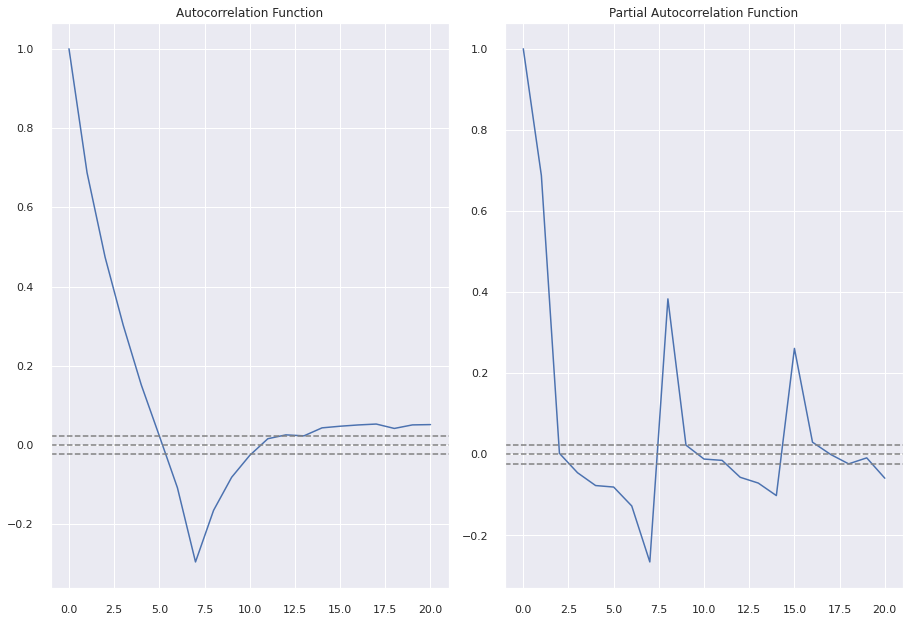

In [41]:
lag_acf = sm.tsa.acf(data_day_shifted, nlags=20)
lag_pacf = sm.tsa.pacf(data_day_shifted, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_day_shifted)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_day_shifted)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_day_shifted)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_day_shifted)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

Stationarity check and STL- decomposition of the series

Dickey-Fuller test : p=2.889532651362758e-10


<Figure size 3600x720 with 0 Axes>

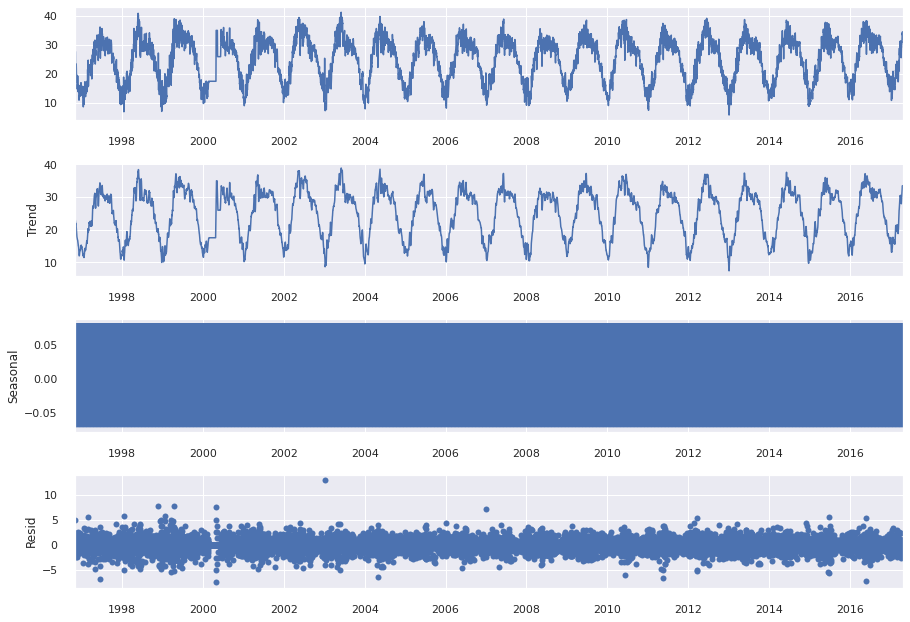

In [42]:
plt.figure(figsize=(50,10))
sm.tsa.seasonal_decompose(data_day).plot()
print(f"Dickey-Fuller test : p={sm.tsa.stattools.adfuller(data_day)[1]}")
plt.show()

Too many values so it is difficult to view seasonality and residuals <br> Lets use `data_month`

Dickey-Fuller test : p=0.07747748327082497


<Figure size 3600x720 with 0 Axes>

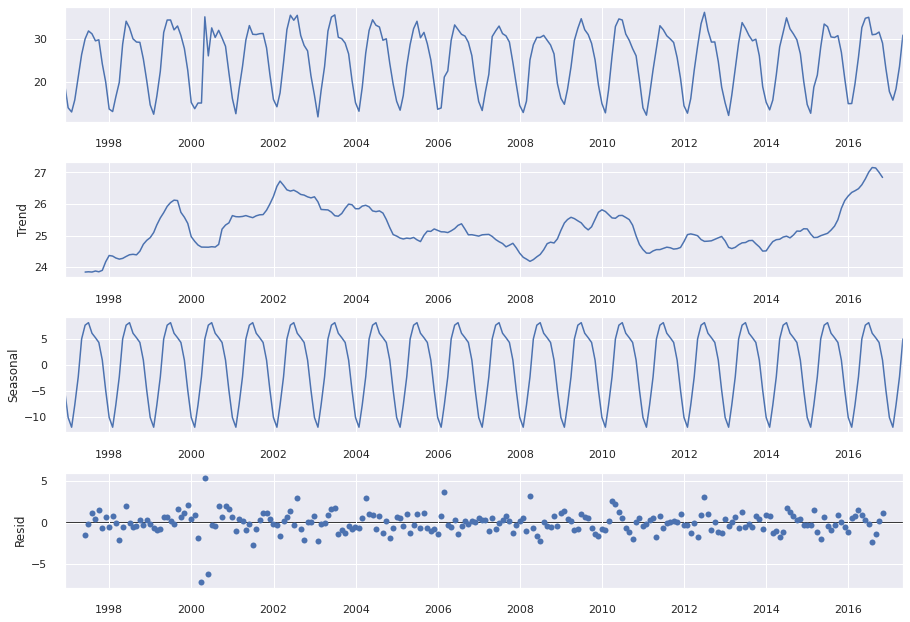

In [43]:
plt.figure(figsize=(50,10))
sm.tsa.seasonal_decompose(data_month).plot()
print(f"Dickey-Fuller test : p={sm.tsa.stattools.adfuller(data_month)[1]}")
plt.show()

Okay we can clearly observe that our data is stationary

Lets scale down the data fo our analysis

In [44]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data_day)

In [45]:
data_scaled

array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       ...,
       [ 0.52795217],
       [ 0.52653214],
       [ 0.47683109]])

In [46]:
data_scaled.shape

(7480, 1)

Lets create dataset for our model

In [47]:
steps = 30
inp = []
out = []
for i in range(len(data_scaled)-(steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [48]:
inp = np.asanyarray(inp)
out = np.asanyarray(out)

In [49]:
inp.shape

(7450, 30, 1)

In [50]:
x_train = inp[:7300,:,:]
x_test = inp[7300:,:,:]
y_train = out[:7300]
y_test = out[7300:]

In [51]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
from keras.utils import plot_model
import keras

In [57]:
early_stop = EarlyStopping(monitor='loss',mode="min",patience=7)

In [58]:
model = keras.Sequential([
    keras.layers.Conv1D(filters=256,kernel_size=2,activation='relu',input_shape=(30,1)),
    keras.layers.Conv1D(filters=128,kernel_size=2, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.RepeatVector(30),
    keras.layers.LSTM(units=100,return_sequences=True,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(units=100,return_sequences=True,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(units=100,return_sequences=True,activation='relu'),
    keras.layers.LSTM(units=100,return_sequences=True,activation='relu'),
    keras.layers.Bidirectional(keras.layers.LSTM(128,activation='relu')),
    keras.layers.Dense(1)
])

In [59]:
model.compile(loss='mse',optimizer='adam')

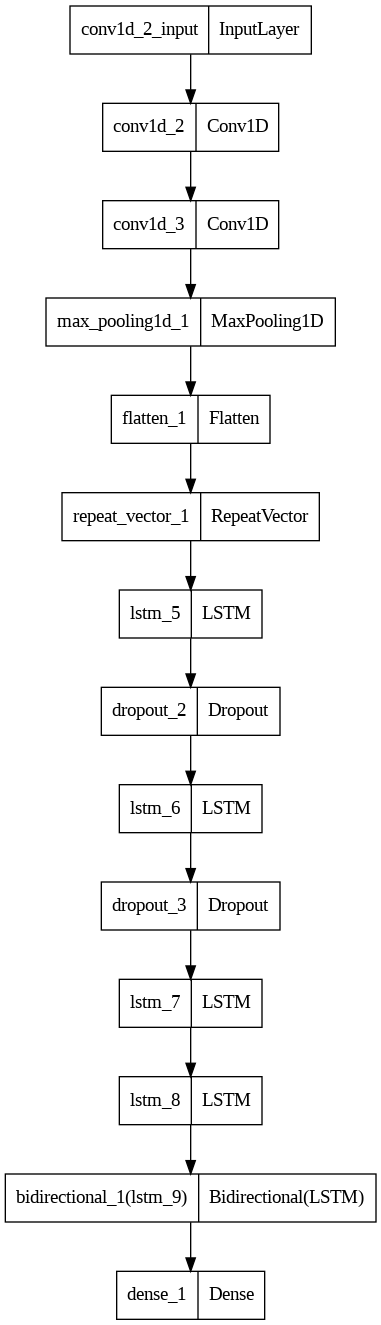

In [60]:
plot_model(model)

In [61]:
history = model.fit(x_train,y_train,epochs=15, verbose=1, callbacks = [early_stop] )

Epoch 1/15
229/229 [==============================] - 93s 363ms/step - loss: 0.0273
Epoch 2/15
229/229 [==============================] - 83s 364ms/step - loss: 0.0121
Epoch 3/15
229/229 [==============================] - 82s 359ms/step - loss: 0.0108
Epoch 4/15
229/229 [==============================] - 85s 372ms/step - loss: 0.0107
Epoch 5/15
229/229 [==============================] - 82s 356ms/step - loss: 0.0106
Epoch 6/15
229/229 [==============================] - 83s 361ms/step - loss: 0.0102
Epoch 7/15
229/229 [==============================] - 83s 363ms/step - loss: 0.0101
Epoch 8/15
229/229 [==============================] - 83s 361ms/step - loss: 0.0104
Epoch 9/15
229/229 [==============================] - 82s 358ms/step - loss: 0.0145
Epoch 10/15
229/229 [==============================] - 84s 366ms/step - loss: 0.0121
Epoch 11/15
229/229 [==============================] - 82s 357ms/step - loss: 0.0107
Epoch 12/15
229/229 [==============================] - 85s 371ms/step - lo

In [62]:
model.save("./regressor.hdf5")

In [63]:
predict = model.predict(x_test)

5/5 [==============================] - 2s 97ms/step


In [64]:
predict = scalar.inverse_transform(predict)

In [65]:
Ytesting = scalar.inverse_transform(y_test)

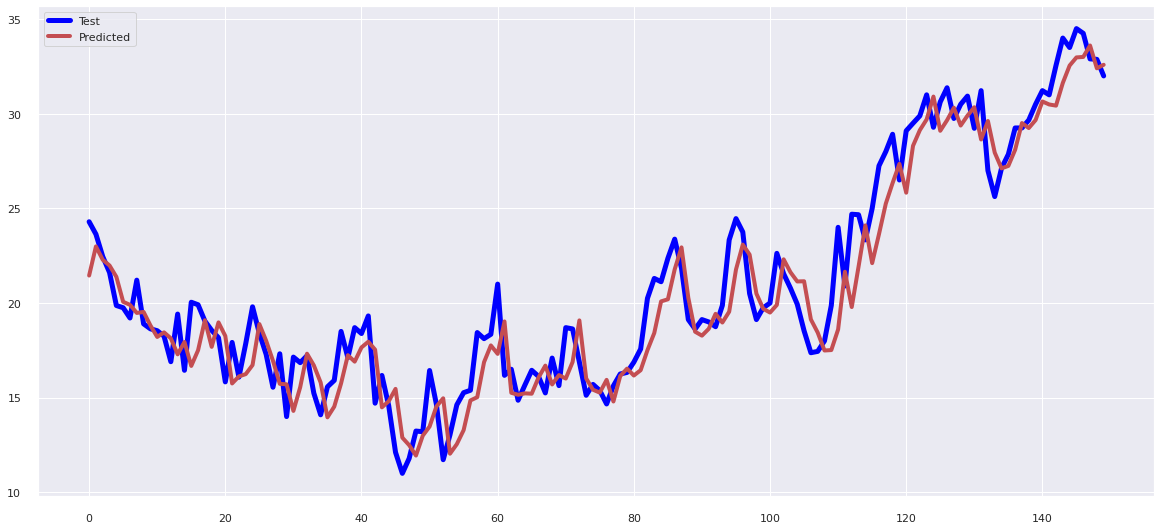

In [66]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)

3.144834662438828

Thank You!